### <center>MLZC Capstone Project 1 - Q4/2022<img align="right" src="/media/insulina_124.jpg">

# <center> Diabetes Health Indicators Dataset
# <center> Part 2/2

# cp1-50 Deployment

### Import

In [12]:
import requests

### Prepare test records with y = [0, 1]
#### (copied from previous notebook) 

In [17]:
dicRec = [{'highbp': 0,
  'highchol': 0,
  'cholcheck': 1,
  'bmi': 31,
  'smoker': 0,
  'stroke': 0,
  'heartdiseaseorattack': 0,
  'physactivity': 1,
  'fruits': 0,
  'veggies': 1,
  'hvyalcoholconsump': 0,
  'anyhealthcare': 1,
  'nodocbccost': 0,
  'genhlth': 1,
  'menthlth': 0,
  'physhlth': 0,
  'diffwalk': 0,
  'sex': 0,
  'age': 9,
  'education': 4,
  'income': 6},
 {'highbp': 1,
  'highchol': 1,
  'cholcheck': 1,
  'bmi': 51,
  'smoker': 1,
  'stroke': 1,
  'heartdiseaseorattack': 1,
  'physactivity': 0,
  'fruits': 1,
  'veggies': 1,
  'hvyalcoholconsump': 0,
  'anyhealthcare': 1,
  'nodocbccost': 0,
  'genhlth': 5,
  'menthlth': 0,
  'physhlth': 30,
  'diffwalk': 1,
  'sex': 0,
  'age': 7,
  'education': 6,
  'income': 5}]

# Docker

<div class="alert alert-block alert-success">
If you want to rebuild docker image, using the bentoml model used in this notebook (without having to train), 
    <p><b>the bentoml files (images) are available in this repo.</b>
    <p>Feel freee to clone.
</div>

In [40]:
! tree bentoml /a

Folder PATH listing
Volume serial number is 000000B0 E8A5:BC16
C:\USERS\ALAIN\DOCUMENTS\PRV\IT\MLZC-CP1\BENTOML
+---bentos
|   \---patient_diabete_risk_service
|       \---ttf3w5d54cdbcnht
|           +---apis
|           +---env
|           |   +---docker
|           |   \---python
|           +---models
|           |   \---patient_diabete_risk
|           |       \---4ngty4d4wcbjynht
|           \---src
\---models
    \---patient_diabete_risk
        \---4ngty4d4wcbjynht


### bentofile.yaml

In [13]:
!type bentofile.yaml

# Same as `bentoml serve <service-name>`
service: "patient_diabete_risk:svc"  

labels:
    owner: alainD
    stage: dev

# all files to be loaded
include:
- "patient_diabete_risk.py"  

# all package needed
python:
    packages:  
    - xgboost
    - pandas
    - scikit-learn
    - pydantic


> **\> bentoml build**

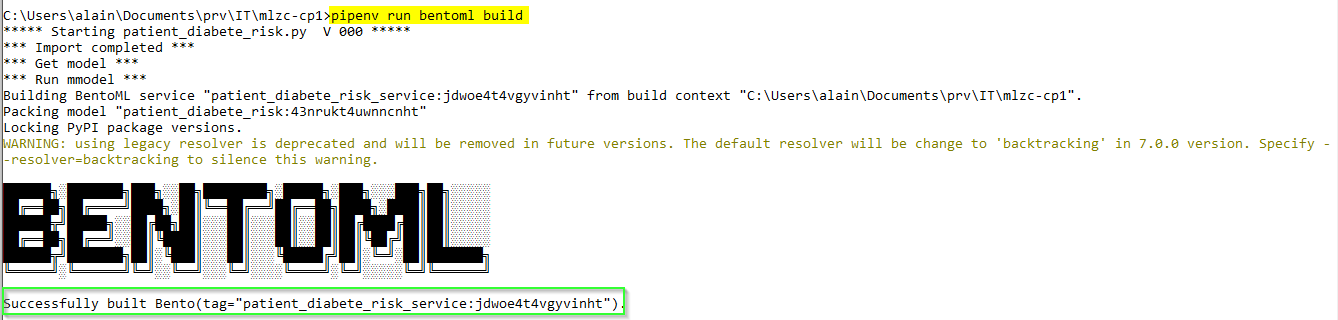

Successfully built Bento(tag="patient_diabete_risk_service:**ttf3w5d54cdbcnht**").

> **\> bentoml containerize patient_diabete_risk_service:ttf3w5d54cdbcnht**

```
(mlzc-mid-xr52rCJ4) C:\Users\alain\Documents\prv\IT\mlzc-mid>bentoml containerize patient_diabete_risk_service:ttf3w5d54cdbcnht
Building docker image for Bento(tag="patient_diabete_risk_service:ttf3w5d54cdbcnht")...
Successfully built docker image for "patient_diabete_risk_service:ttf3w5d54cdbcnht" with tags "patient_diabete_risk_service:ttf3w5d54cdbcnht"
To run your newly built Bento container, pass "patient_diabete_risk_service:ttf3w5d54cdbcnht" to "docker run". For example: "docker run -it --rm -p 3000:3000 patient_diabete_risk_service:ttf3w5d54cdbcnht serve --production".
```

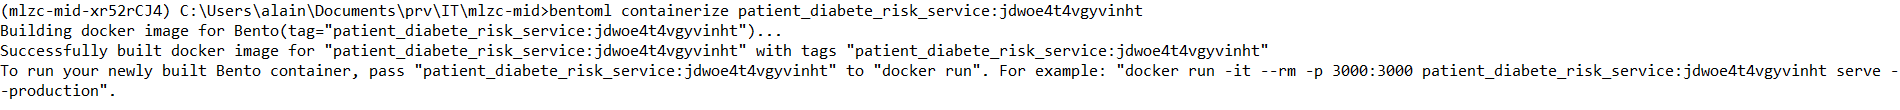

> **\> docker run -it --rm -p 3000:3000 patient_diabete_risk_service:ttf3w5d54cdbcnht serve --production**

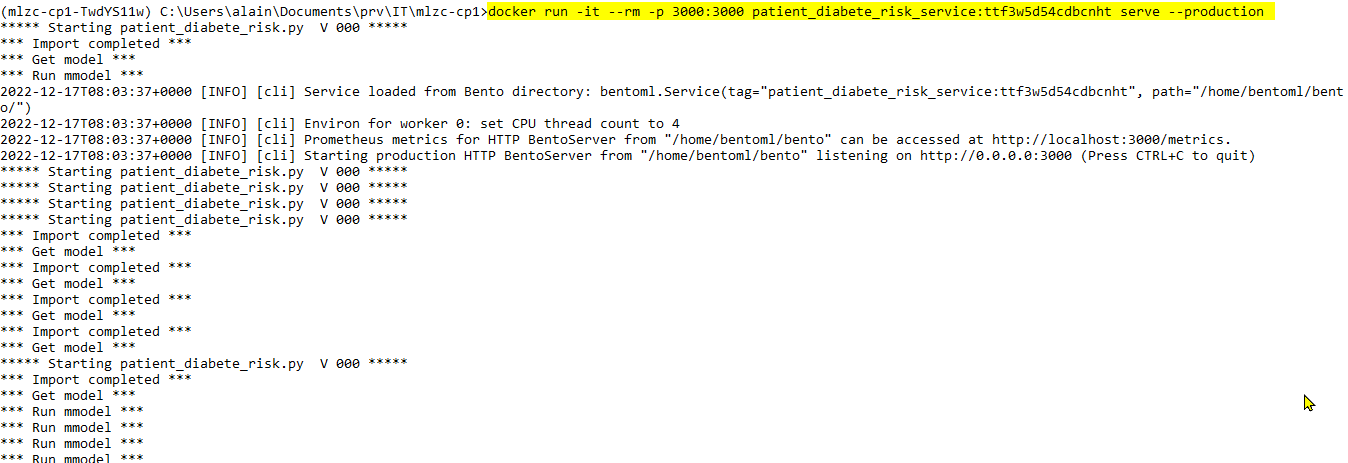

> **\> http://localhost:3000**

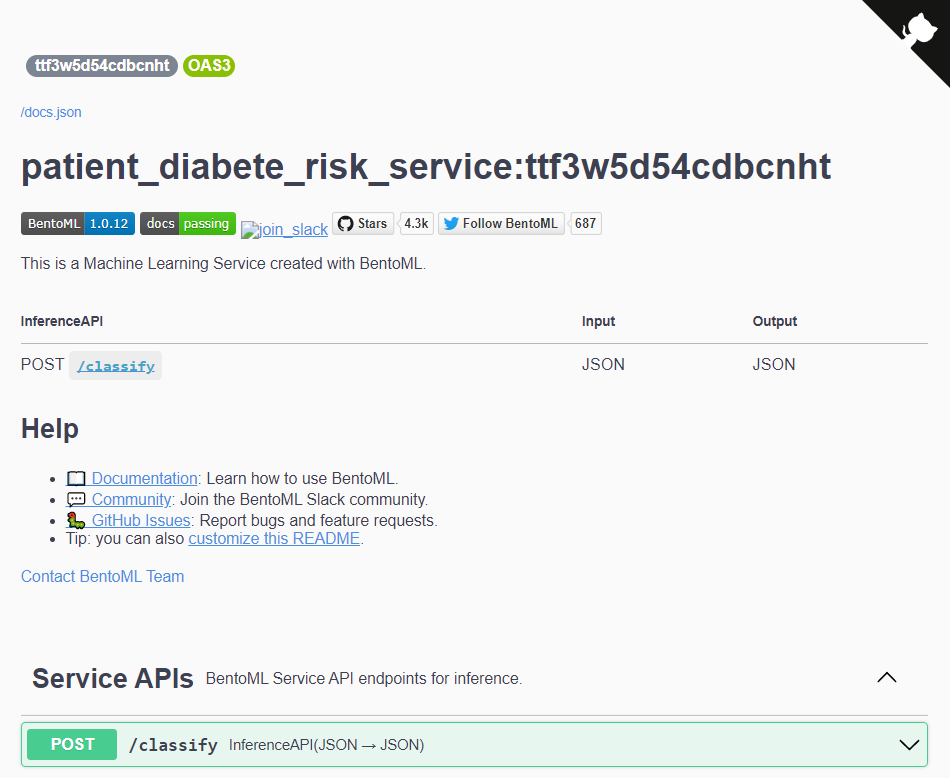

## Test Bentoml service (docker serving)

In [18]:
url = 'http://localhost:3000/classify'

In [20]:
# y = 0
requests.post(url, json=dicRec[0]).json()

{'prediction': [0.018901225179433823], 'interpret': 'Diabete NOT probable'}

In [22]:
# y = 1
requests.post(url, json=dicRec[1]).json()

{'prediction': [0.8610714673995972], 'interpret': 'Diabete probable'}

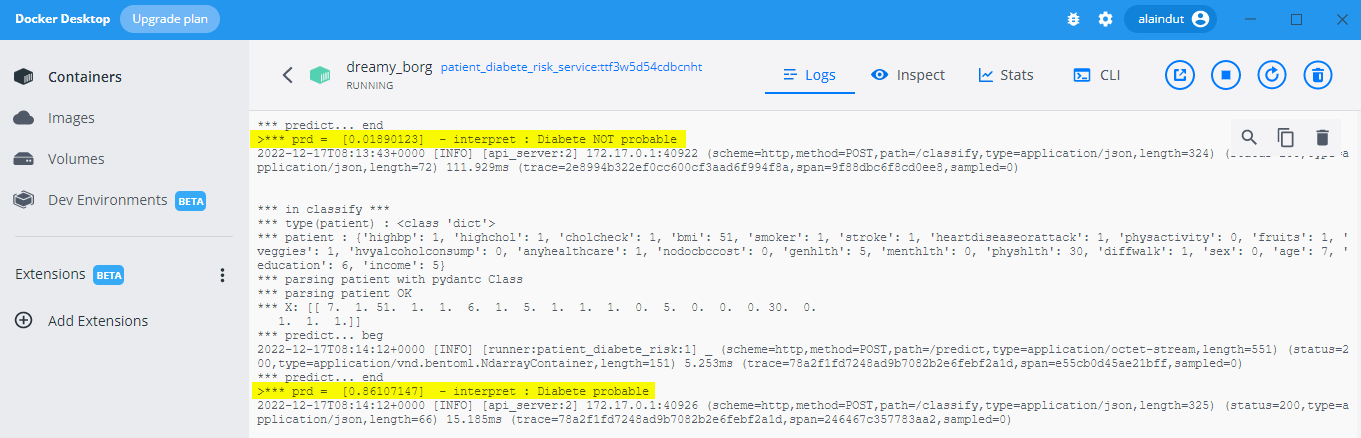

#   
# Cloud Deployment (kubernetes in mogenius cloud)

#   
## 1. Push image to docker (hub)

> **\> docker login -u alaindut (+ pswd docker)**   
> > user/psw   
    
> **\> docker tag patient_diabete_risk_service:ttf3w5d54cdbcnht alaindut/patient_diabete_risk_service:V001** 
> > alaindut = username docker   
> > second tag = something   

> **\> docker image list**
> > verify image created with username

> **\> docker push alaindut/patient_diabete_risk_service:V001**

```
        The push refers to repository [docker.io/alaindut/patient_diabete_risk_service]
        38c9b6f3d555: Pushed
        908253af2958: Pushed
        2a67a254ee51: Pushed
        56998a25800a: Pushed
        5f70bf18a086: Mounted from alaindut/patient_death_risk_service
        5e51737db764: Pushed
        d856d570b228: Pushed
        f86a145c5723: Pushed
        393b4b438f3a: Pushed
        c43e4ddc5992: Mounted from library/python
        e5896e4ce6c3: Mounted from library/python
        7c40600bc52d: Mounted from library/python
        d326469892d9: Mounted from library/python
        b5ebffba54d3: Mounted from library/python
        V001: digest: sha256:508a8f1e2e60302c04efe0cca1eb1444310a6d3fb0413486f8052f240e2b922f size: 3248
```

# 
## 2. Create Kubernetes service in mogenius to serve it
https://studio.mogenius.com/

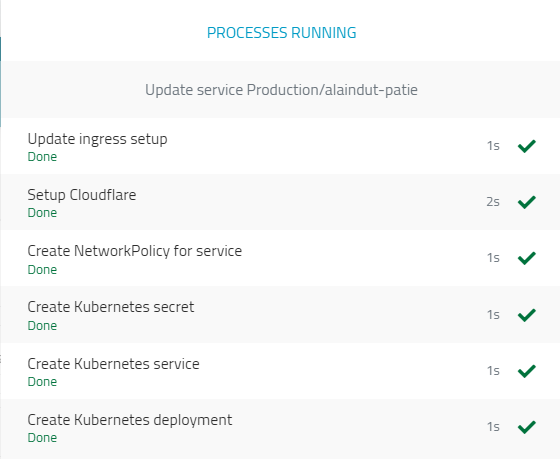

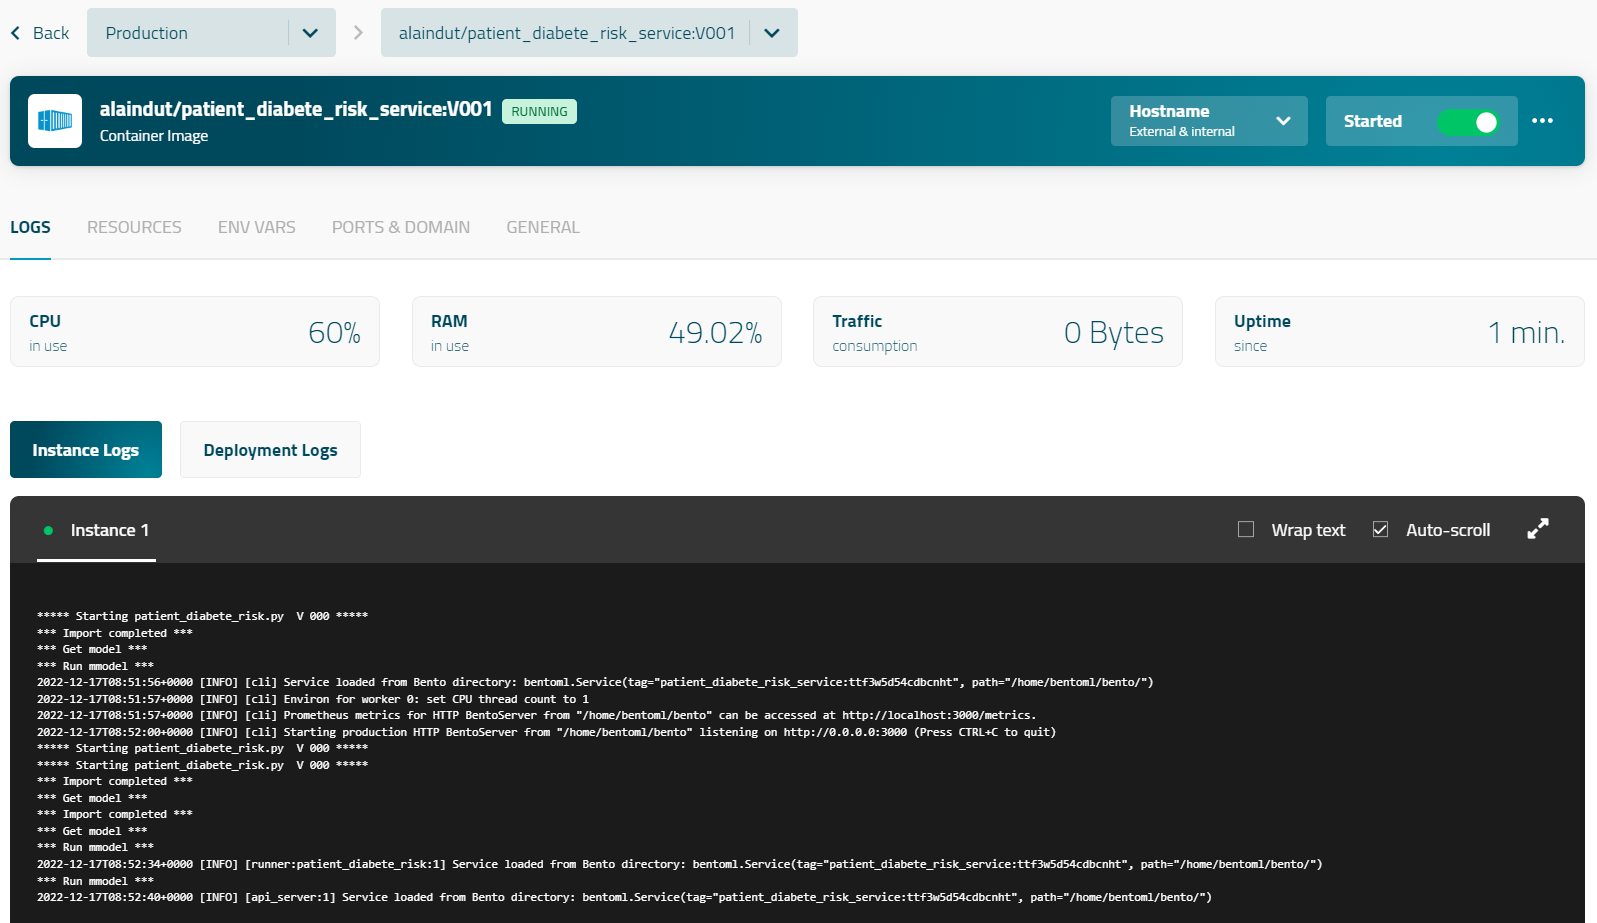

#    
## Test cloud service using swagger

https://alaindut-patie-prod-patient-death-risk-service-xejta4.mo5.mogenius.io/

<div class="alert alert-block alert-warning">
In (this version of) Swagger, json tags need to be entered with <b>double quotes '"'<b>.
<p>Use exemple below (or similar ;-) to test it !
</div>

```
# y = 0
{"highbp": 0,
  "highchol": 0,
  "cholcheck": 1,
  "bmi": 31,
  "smoker": 0,
  "stroke": 0,
  "heartdiseaseorattack": 0,
  "physactivity": 1,
  "fruits": 0,
  "veggies": 1,
  "hvyalcoholconsump": 0,
  "anyhealthcare": 1,
  "nodocbccost": 0,
  "genhlth": 1,
  "menthlth": 0,
  "physhlth": 0,
  "diffwalk": 0,
  "sex": 0,
  "age": 9,
  "education": 4,
  "income": 6}
```

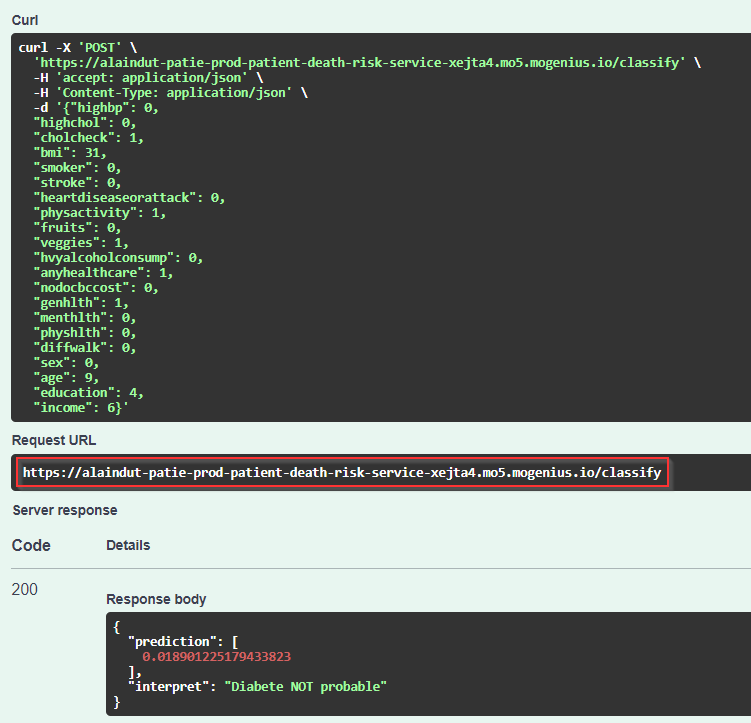

# 
## Test cloud service using "requests"

In [34]:
url = 'https://alaindut-patie-prod-patient-death-risk-service-xejta4.mo5.mogenius.io/classify'

In [35]:
# y = 0
requests.post(url, json=dicRec[0]).json()

{'prediction': [0.018901225179433823], 'interpret': 'Diabete NOT probable'}

In [36]:
# y = 1
requests.post(url, json=dicRec[1]).json()

{'prediction': [0.8610714673995972], 'interpret': 'Diabete probable'}

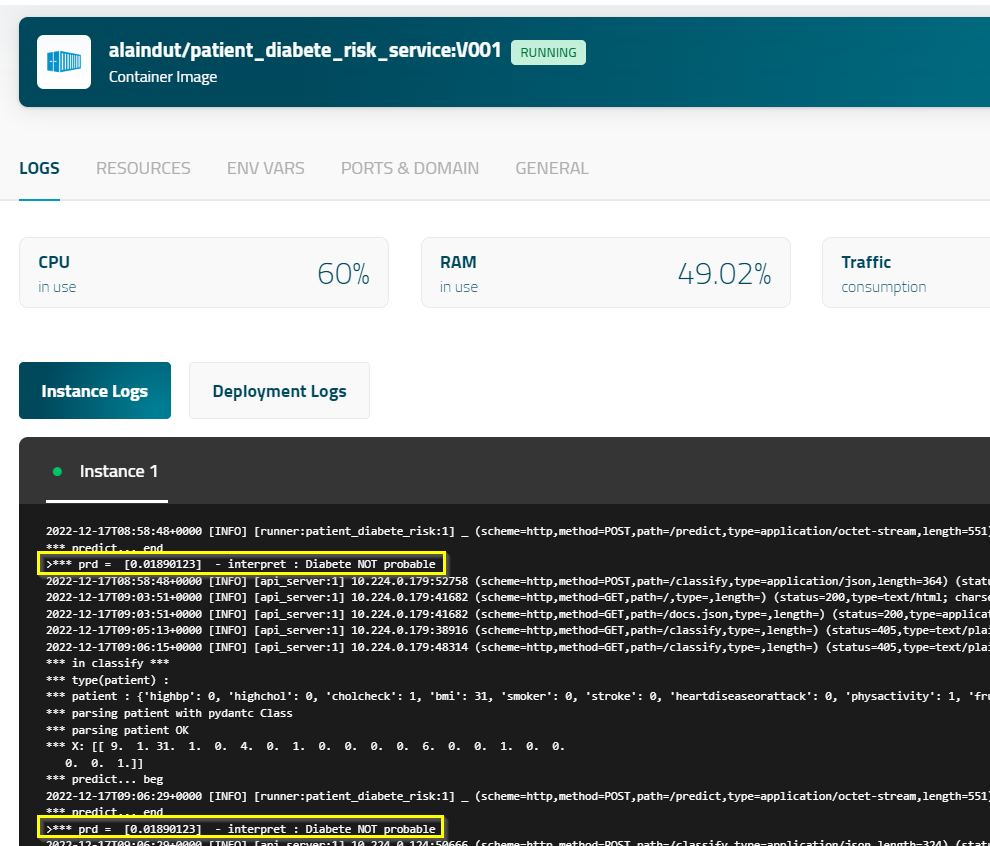